In [20]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [22]:
combined = pd.concat([train.drop("rainfall",axis=1), test], axis=0)


In [39]:
x=train.drop(['rainfall','id'],axis=1).copy()
y=train['rainfall']

In [34]:
def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  # desc['mean']=df.mean()
  # desc['median']=df.median()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  # desc['freq/mean']=desc['freq'].fillna(desc['mean']).drop(['freq','mean'],axis=1)
  display(desc)
describe(train)

dtype  null  %null  count         mean         std  \
id                     int64     0    0.0   2190  1094.500000  632.342866   
day                    int64     0    0.0   2190   179.948402  105.203592   
pressure             float64     0    0.0   2190  1013.602146    5.655366   
maxtemp              float64     0    0.0   2190    26.365799    5.654330   
temparature          float64     0    0.0   2190    23.953059    5.222410   
mintemp              float64     0    0.0   2190    22.170091    5.059120   
dewpoint             float64     0    0.0   2190    20.454566    5.288406   
humidity             float64     0    0.0   2190    82.036530    7.800654   
cloud                float64     0    0.0   2190    75.721918   18.026498   
sunshine             float64     0    0.0   2190     3.744429    3.626327   
winddirection        float64     0    0.0   2190   104.863151   80.002416   
windspeed            float64     0    0.0   2190    21.804703    9.898659   
rainfall               int64     0    0.0   2190     0.753425    0.431116   
calculated_dewpoint  float64     0    0.0   2190    20.360365    5.412941   
wind_chill           float64     0    0.0   2190    23.942843    5.256415   
heat_index           float64     0    0.0   2190    26.205888    7.854525   
adjusted_sunshine    float64     0    0.0   2190    -3.827763    5.189030   
calculated_humidity  float64     0    0.0   2190    81.368798    9.136753   

                            min          25%          50%          75%  \
id                     0.000000   547.250000  1094.500000  1641.750000   
day                    1.000000    89.000000   178.500000   270.000000   
pressure             999.000000  1008.600000  1013.000000  1017.775000   
maxtemp               10.400000    21.300000    27.800000    31.200000   
temparature            7.400000    19.300000    25.500000    28.400000   
mintemp                4.000000    17.700000    23.850000    26.400000   
dewpoint              -0.300000    16.800000    22.150000    25.000000   
humidity              39.000000    77.000000    82.000000    88.000000   
cloud                  2.000000    69.000000    83.000000    88.000000   
sunshine               0.000000     0.400000     2.400000     6.800000   
winddirection         10.000000    40.000000    70.000000   200.000000   
windspeed              4.400000    14.125000    20.500000    27.900000   
rainfall               0.000000     1.000000     1.000000     1.000000   
calculated_dewpoint   -2.300000    16.300000    22.200000    24.800000   
wind_chill             3.692086    19.300000    25.500000    28.400000   
heat_index             7.400000    19.300000    25.500000    33.485149   
adjusted_sunshine    -10.000000    -8.200000    -5.800000     0.000000   
calculated_humidity   34.652531    76.002596    81.934282    87.377283   

                             max  unique  
id                   2189.000000    2190  
day                   365.000000     365  
pressure             1034.600000     236  
maxtemp                36.000000     219  
temparature            31.500000     198  
mintemp                29.800000     199  
dewpoint               26.700000     218  
humidity               98.000000      49  
cloud                 100.000000      78  
sunshine               12.100000     120  
winddirection         300.000000      35  
windspeed              59.500000     223  
rainfall                1.000000       2  
calculated_dewpoint    28.800000     405  
wind_chill             31.500000     198  
heat_index             43.871551     593  
adjusted_sunshine      10.000000     399  
calculated_humidity   115.051172    1663

In [40]:
# from sklearn.model_selection import KFold, GroupKFold
# from sklearn.metrics import roc_auc_score
# from sklearn.svm import SVC, LinearSVC
# # from cuml.svm import SVC, LinearSVC

# INTERACT = []
# RMV = ['rainfall','id','year_group']
# train['year_group'] = train['id']//365
# FEATURES = [c for c in list( train.columns ) if not c in RMV]

# for i,c1 in enumerate(FEATURES):
#     for j,c2 in enumerate(FEATURES[i+1:]):
#         n = f"{c1}_{c2}"
#         train[n] = train[c1] * train[c2]
#         test[n] = test[c1] * test[c2]
#         INTERACT.append(n)
# print(f"There are {len(INTERACT)} interaction features:")
# print( INTERACT )


# ADD  = []
# best_auc = 0
# best_oof = None
# best_pred = None

# # FORWARD FEATURE SELECTION
# for k,col in enumerate(['baseline']+INTERACT):

#     FOLDS = train.year_group.nunique()
#     kf = GroupKFold(n_splits=FOLDS)

#     oof_svc = np.zeros(len(train))
#     pred_svc = np.zeros(len(test))

#     if col!='baseline': ADD.append(col)

#     # GROUP K FOLD USING YEAR AS GROUP
#     for i, (train_index, test_index) in enumerate(kf.split(train,groups=train.year_group)):
#         #print("#"*25)
#         #print(f"### Fold {i+1}")
#         #print("#"*25)

#         # TRAIN AND VALID DATA
#         x_train = train.loc[train_index,FEATURES+ADD ].copy()
#         y_train = train.loc[train_index,"rainfall"]
#         x_valid = train.loc[test_index,FEATURES+ADD ].copy()
#         y_valid = train.loc[test_index,"rainfall"]
#         x_test = test[FEATURES+ADD ].copy()

#         # SVC WANTS STANDARIZED FEATURES
#         for c in FEATURES+ADD:
#             m = x_train[c].mean()
#             s = x_train[c].std()
#             x_train[c] = (x_train[c]-m)/s
#             x_valid[c] = (x_valid[c]-m)/s
#             x_test[c] = (x_test[c]-m)/s
#             x_test[c] = x_test[c].fillna(0)

#         # TRAIN SVC MODEL
#         #model = SVC(C=0.1, probability=True, kernel='poly', degree=1)
#         model = LinearSVC(C=0.1, probability=True)
#         model.fit(x_train.values, y_train.values)

#         # INFER OOF
#         oof_svc[test_index] = model.predict_proba(x_valid.values)[:,1]
#         # INFER TEST
#         pred_svc += model.predict_proba(x_test.values)[:,1]

#     # COMPUTE AVERAGE TEST PREDS
#     pred_svc /= FOLDS

#     # COMPUTE CV VALIDATION AUC SCORE
#     true = train.rainfall.values
#     m = roc_auc_score(true, oof_svc)

#     if m>best_auc:
#         print(f"NEW BEST with {col} at {m}")
#         best_auc = m
#         best_oof = oof_svc.copy()
#         best_pred = pred_svc.copy()
#     else:
#         print(f"Worse with {col} at {m}")
#         ADD.remove(col)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
model = LinearSVC(C=0.1)

xtr,xte,ytr,yte=train_test_split(x, y, test_size=0.2, shuffle=False,random_state=42)
# Initialize RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features

# Fit RFE to the training data
rfe.fit(xtr, ytr)

# Get the selected features
selected_features = x.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['dewpoint', 'sunshine', 'calculated_dewpoint', 'wind_chill',
       'adjusted_sunshine'],
      dtype='object')


In [30]:
def new_features(df):

  # 1. Dew Point Calculation using Temperature and Humidity
  def calculate_dewpoint(temp, humidity):
      return temp - ((100 - humidity) / 5)

  df['calculated_dewpoint'] = df.apply(lambda row: calculate_dewpoint(row['temparature'], row['humidity']), axis=1)

  # 2. Wind Chill Calculation (using temÎperature and wind speed)
  def calculate_wind_chill(temp, wind_speed):
      if temp <= 10 and wind_speed >= 4.8:
          return 13.12 + 0.6215 * temp - 11.37 * (wind_speed**0.16) + 0.3965 * temp * (wind_speed**0.16)
      else:
          return temp  # If not cold enough, wind chill = temp itself

  df['wind_chill'] = df.apply(lambda row: calculate_wind_chill(row['temparature'], row['windspeed']), axis=1)

  # 3. Heat Index Calculation (using temperature and humidity)
  def calculate_heat_index(temp, humidity):
      if temp >= 27 and humidity >= 40:
          HI = (-8.78469475556 + 1.61139411 * temp + 2.33854883889 * humidity - 0.14611605 * temp * humidity -
                0.012308094 * temp**2 - 0.0164248277778 * humidity**2 + 0.002211732 * temp**2 * humidity +
                0.00072546 * temp * humidity**2 - 0.000003582 * temp**2 * humidity**2)
          return HI
      else:
          return temp  # If conditions don't meet, no heat index, return temperature itself

  df['heat_index'] = df.apply(lambda row: calculate_heat_index(row['temparature'], row['humidity']), axis=1)

  # 4. Cloud Cover Affect on Sunshine (assuming it's inverse relationship)
  df['adjusted_sunshine'] = df['sunshine'] - (df['cloud'] / 10)

  # 5. Relative Humidity (Optional - if you want to compute based on temperature and dew point)
  def calculate_relative_humidity(temp, dewpoint):
      # Magnus formula approximation for RH
      return 100 * (np.exp((17.27 * dewpoint) / (dewpoint + 237.7)) / np.exp((17.27 * temp) / (temp + 237.7)))

  df['calculated_humidity'] = df.apply(lambda row: calculate_relative_humidity(row['temparature'], row['dewpoint']), axis=1)

  return df
train=new_features(train)



In [ ]:
combined

(730, 12)

In [ ]:
k=0
for i in range(1,366):
    c=train[train['day']==i]['id'].count()
    if c  < 6:
        display(train[train['day']==i])
        break

        k+=1
print(k)

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
37      37   38    1021.8     21.1         18.2     17.8      16.9      74.0   
402    402   38    1013.0     24.5         22.8     20.9      20.3      86.0   
767    767   38    1020.6     21.2         18.2     17.3      14.6      79.0   
1497  1497   38    1020.2     21.2         18.9     17.2      15.0      74.0   
1862  1862   38    1020.6     25.1         21.8     19.2      16.4      71.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
37     44.0       9.5           20.0       26.7         0  
402    92.0       0.0           70.0       15.7         1  
767    83.0       2.2           20.0       17.3         1  
1497   35.0       9.8           30.0       18.6         0  
1862   88.0       0.6           20.0       40.0         1

0


In [ ]:
k=0
# for i in range(1,366):
#     c=train[train['day']==i]['id'].count()
#     if c == 8:
#         display(train[train['day']==i])

#         k+=1
# print(k)
for i in range(0,366):
    for j in range(0,6):
        if train[(train["id"]==j*365 + i) & (train['day']==i+1)].empty:
           k+=1
           if  train[train["id"]==j*365 + i].empty:
            continue
           else:
            # display(train[train["id"]==j*365 + i])
            # train.loc[train["id"] == j*365 + i, "error"] = "group_2"
            train.loc[train["id"] == j*365 + i, "day"] =i+1
            k+=1
print(k)
# print(train['error'].fillna(value="group_1" ,inplace=True))
k=0
for i in range(0,366):
    for j in range(0,6):
        if train[(train["id"]==j*365 + i) & (train['day']==i+1)].empty:
           k+=1
           if  train[train["id"]==j*365 + i].empty:
            continue
           else:
            k+=1
print(k)




81
11


In [ ]:
test.tail()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
725  2915  361    1020.8     18.2         17.6     16.1      13.7      96.0   
726  2916  362    1011.7     23.2         18.1     16.0      16.0      78.0   
727  2917  363    1022.7     21.0         18.5     17.0      15.5      92.0   
728  2918  364    1014.4     21.0         20.0     19.7      19.8      94.0   
729  2919  365    1020.9     22.2         18.8     17.0      13.3      79.0   

     cloud  sunshine  winddirection  windspeed  
725   95.0       0.0           20.0       34.3  
726   80.0       1.6           40.0       25.2  
727   96.0       0.0           50.0       21.9  
728   93.0       0.0           50.0       39.5  
729   89.0       0.2           60.0       50.6

In [ ]:
test.shape

(730, 12)

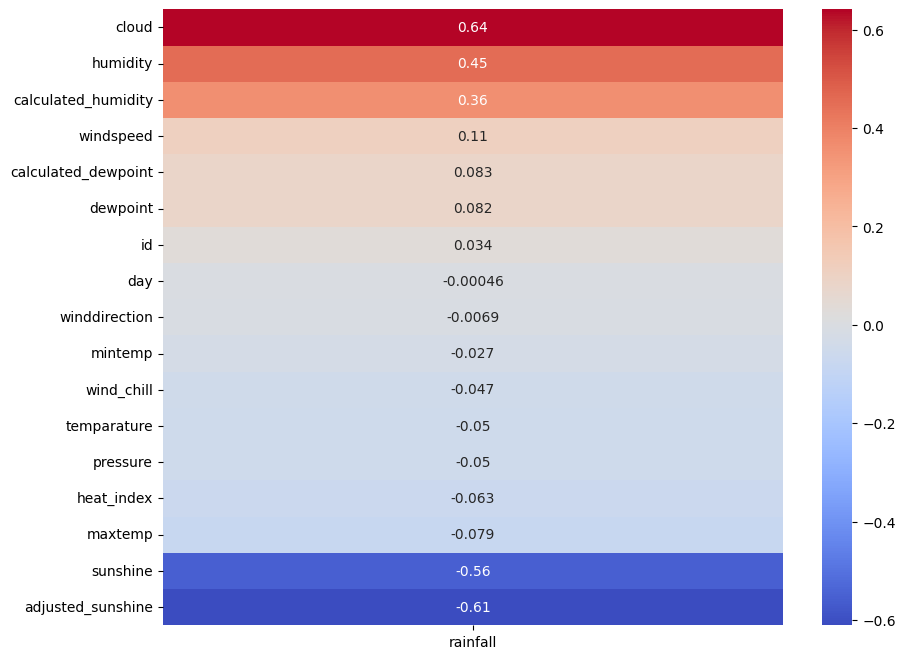

In [32]:
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['rainfall']].drop('rainfall').sort_values(by='rainfall', ascending=False), annot=True, cmap='coolwarm')
plt.show()

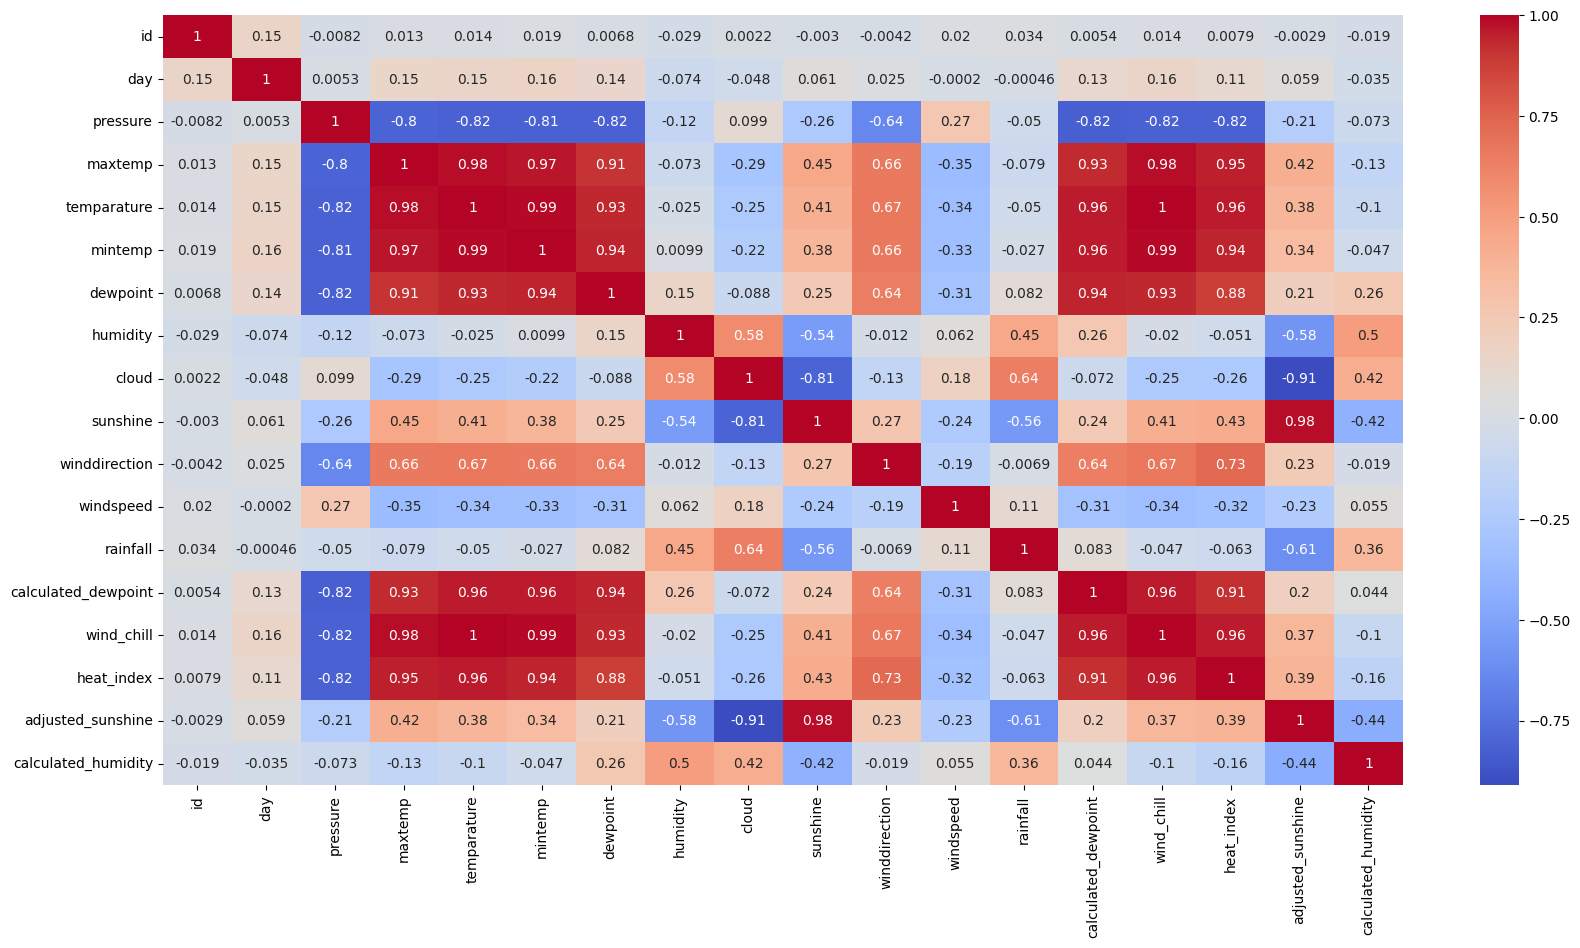

In [36]:
correlation_matrix = train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm')
plt.show()

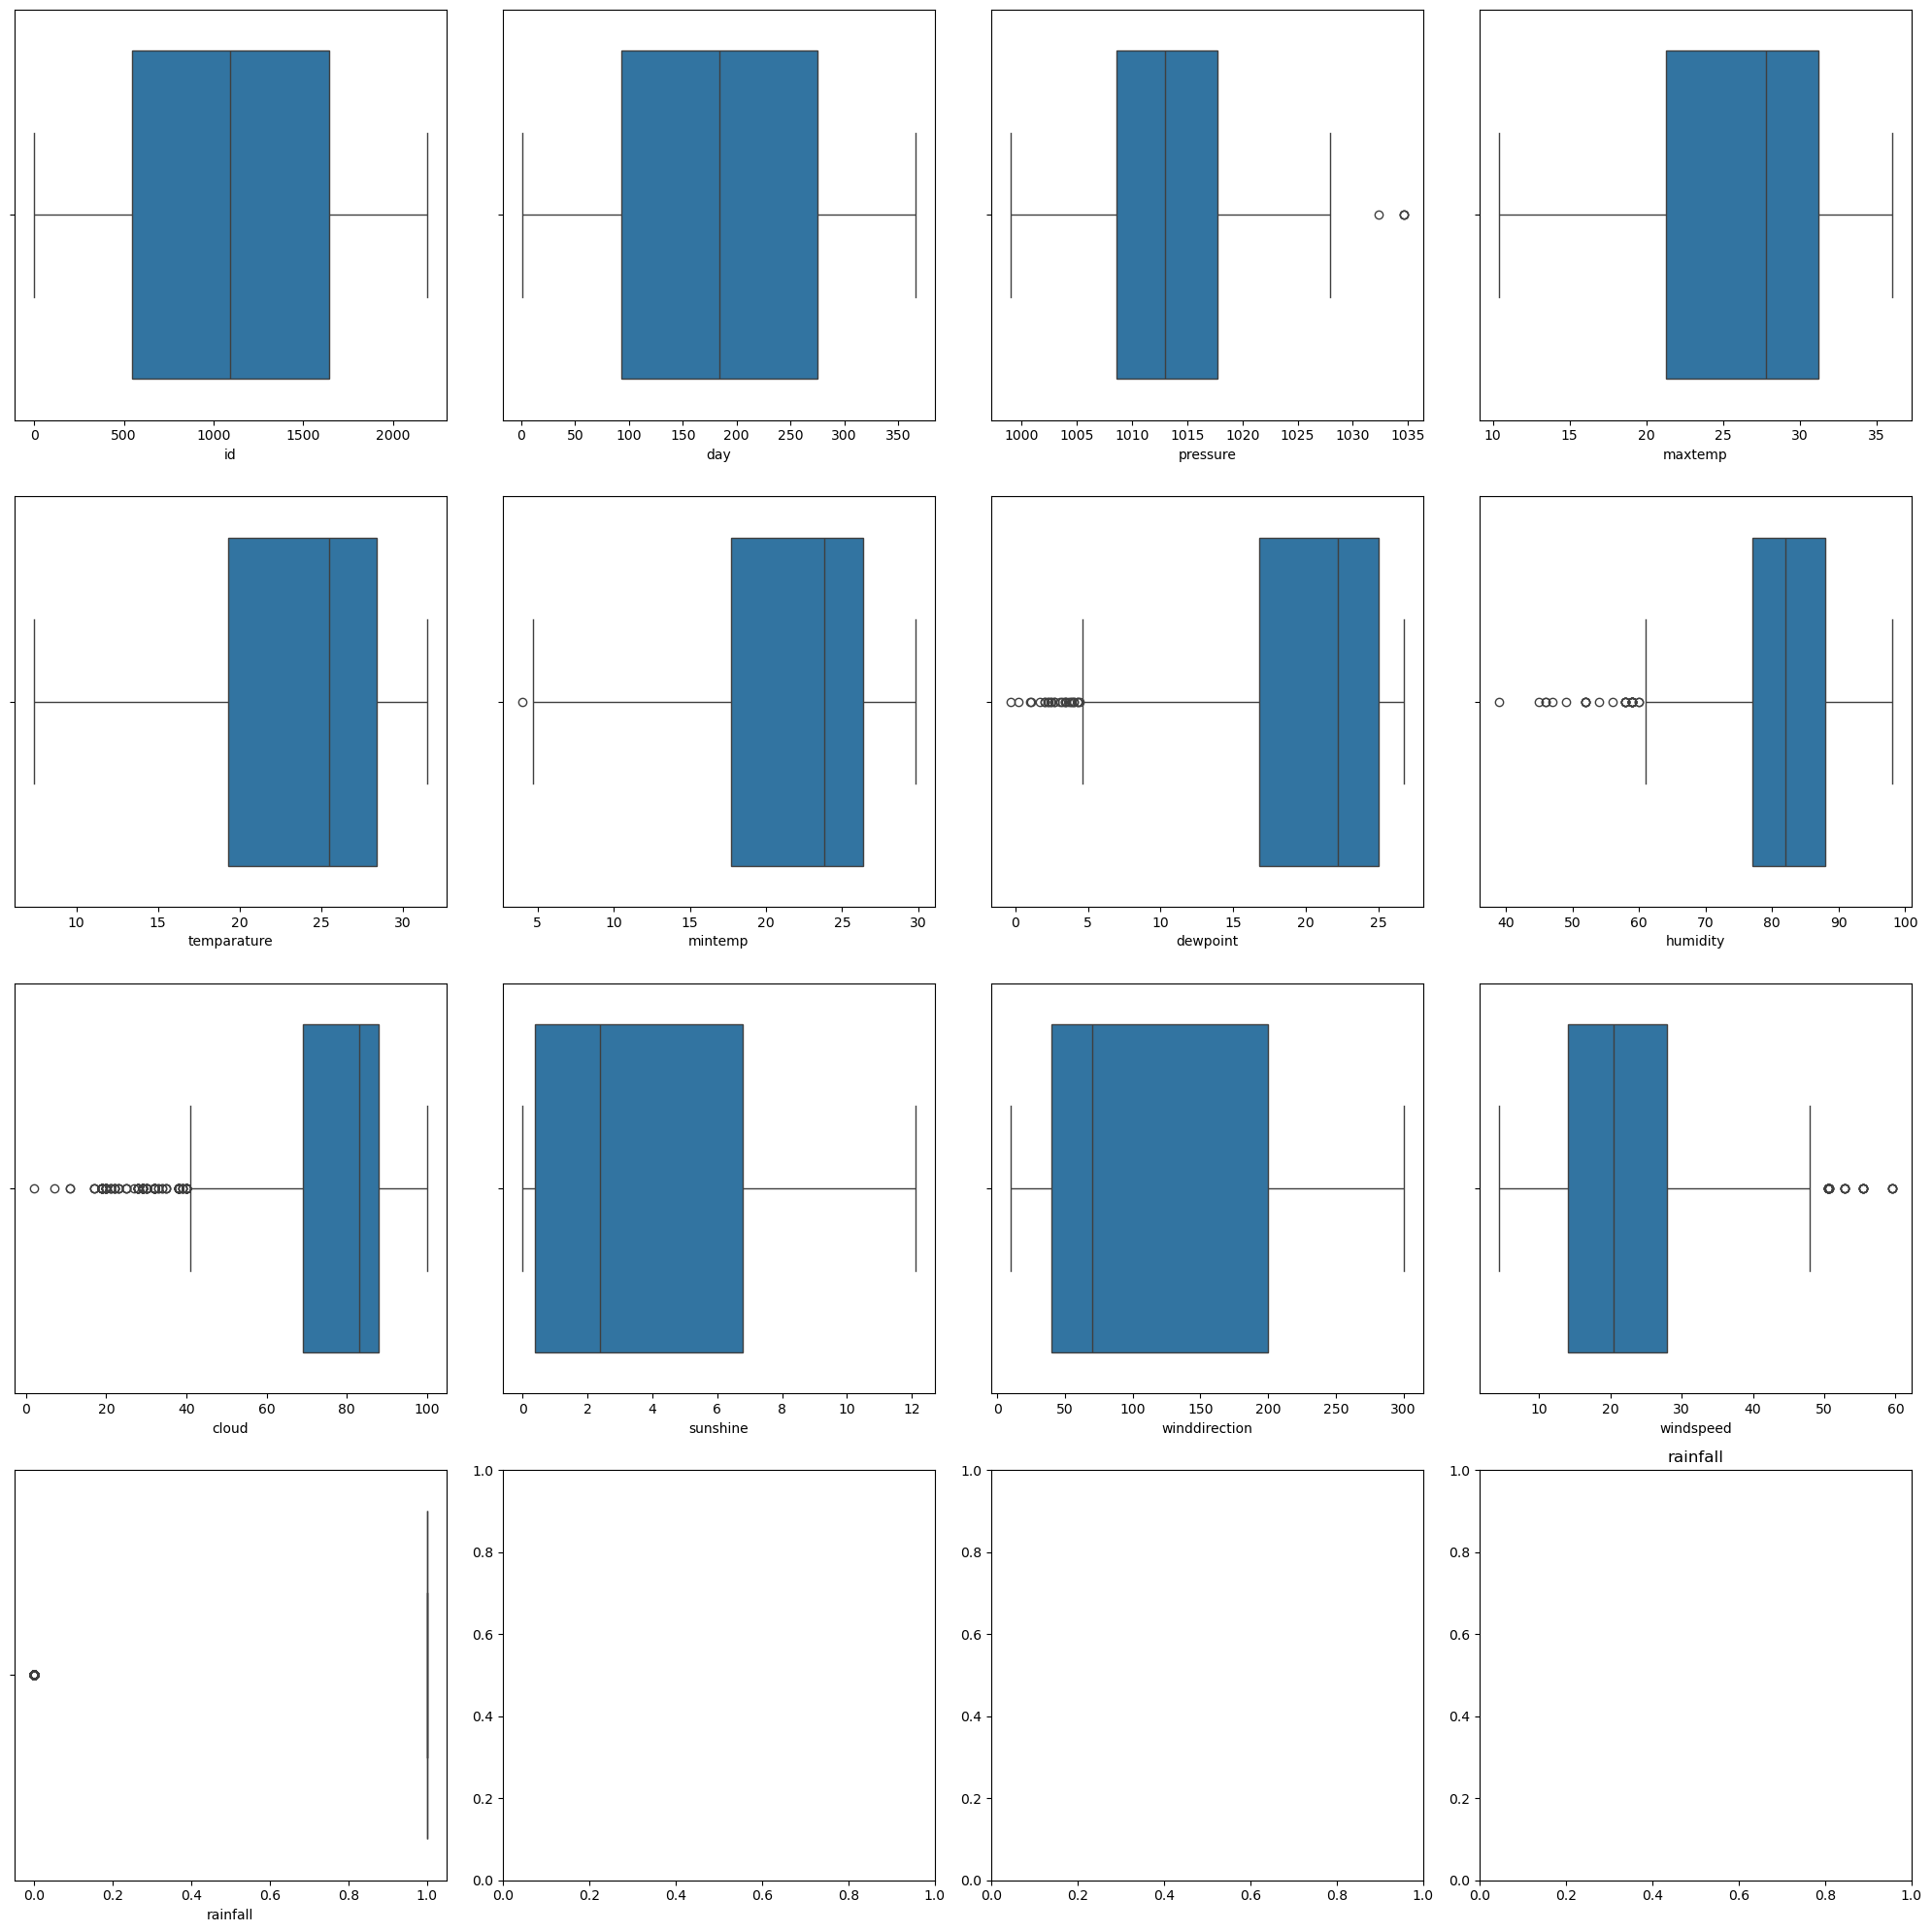

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(20,20))
ax=ax.flatten()
i=0
for cols in train.columns:
    if i<len(ax):
        sns.boxplot(data=train,x=train[cols],ax=ax[i])
        plt.title(cols)
        i+=1
plt.tight_layout()
plt.show()

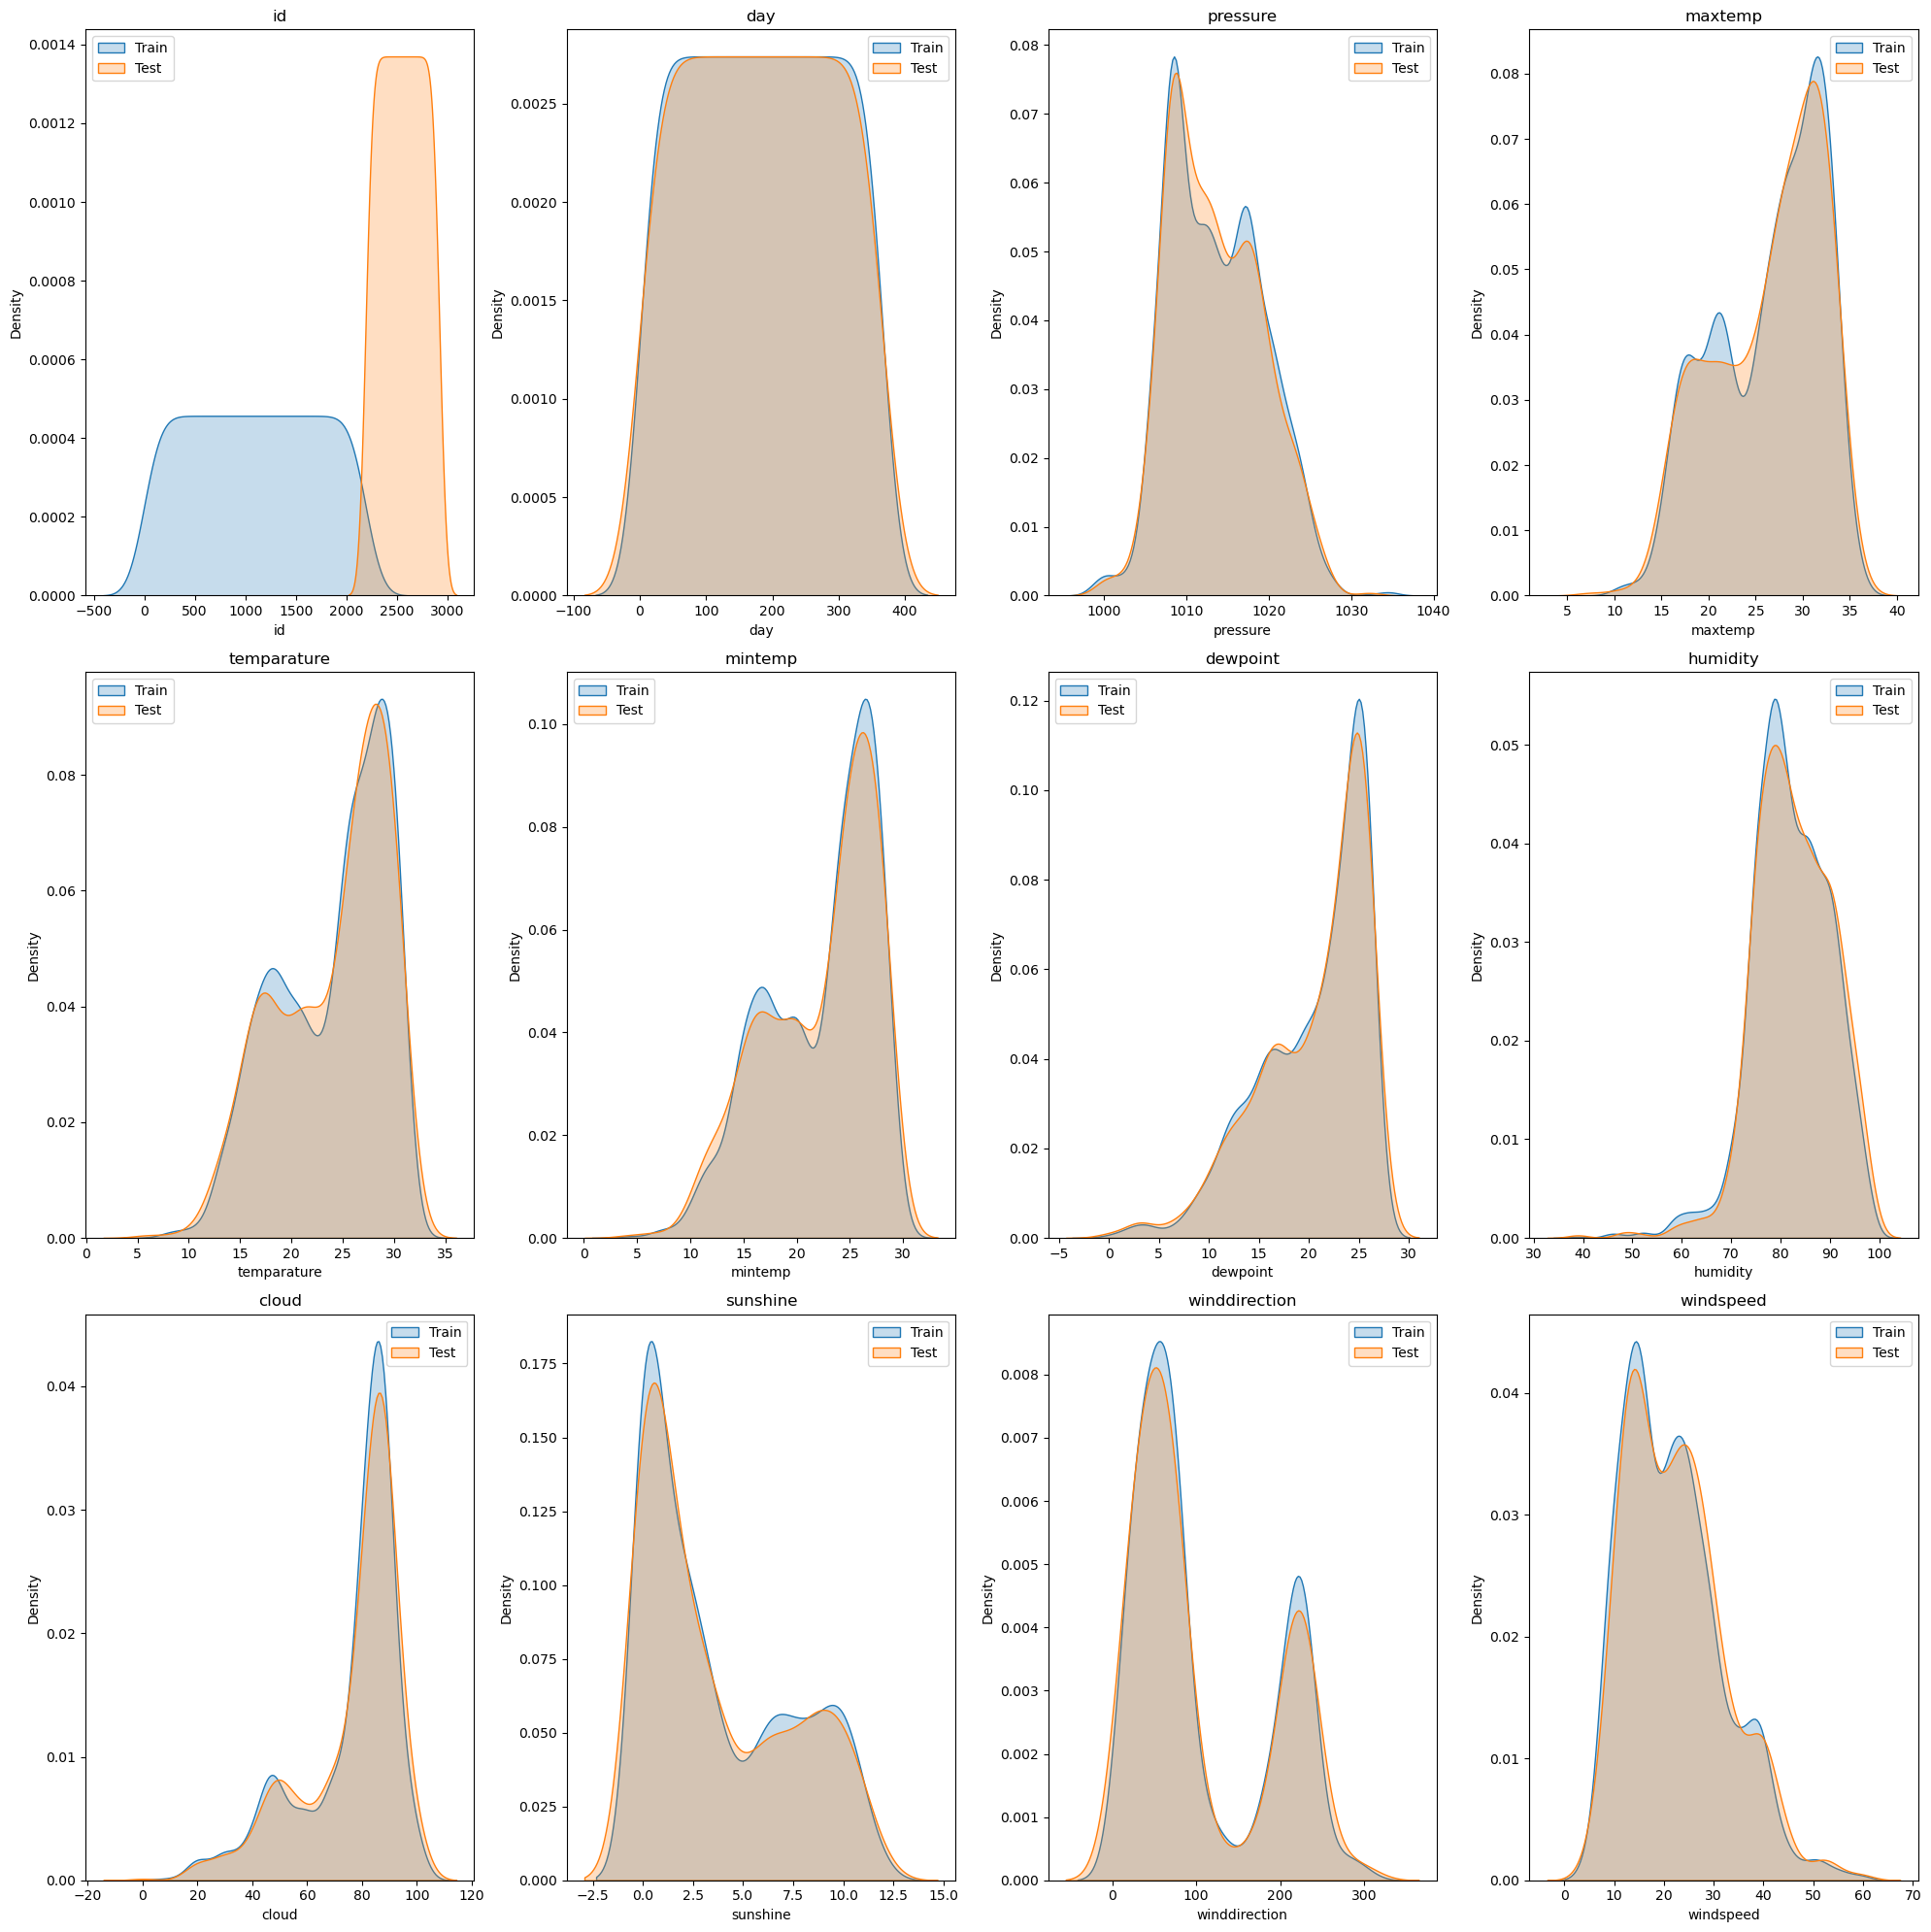

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
ax = ax.flatten()
i = 0
for col in train.columns:
    if col != 'rainfall':
        sns.kdeplot(data=train, x=col, ax=ax[i], label="Train", fill=True)
        sns.kdeplot(data=test, x=col, ax=ax[i], label="Test", fill=True)
        ax[i].set_title(col)
        ax[i].legend()
        i += 1
plt.tight_layout()

for j in range(i, len(ax)):
    ax[j].axis("off")

plt.show()

In [ ]:
import numpy as np
from scipy import stats
z_scores = np.abs(stats.zscore(train))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 2
outliers = (z_scores > threshold)
min_outliers = 5  # Change this value to the desired number of outlier features

# Count the number of outlier features in each row
outlier_count = outliers.sum(axis=1)

# Get rows where the count of outlier features is greater than or equal to min_outliers
outlier_rows = train[outlier_count >= min_outliers]
# # Get the rows with outliers
# outlier_rows = train[outliers.all(axis=1)]
print("Outliers based on Z-score method:")
display(outlier_rows)

Outliers based on Z-score method:


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
65      65   66    1022.7     14.3         12.8     10.0       8.0      63.0   
383    383   19    1034.6     11.2         10.4      7.0       3.4      77.0   
384    384   20    1025.3     12.9          8.3      7.5       4.4      47.0   
759    759   30    1021.4     14.5         12.9     10.5       4.3      70.0   
1100  1100    6    1020.6     17.6         13.2     11.2       6.8      59.0   
1111  1111   17    1025.9     10.9          8.6      7.0       1.0      73.0   
1464  1464    5    1027.1     10.8          7.4      8.1       2.5      61.0   
1466  1466    7    1027.4     10.4         10.4      8.1       2.2      77.0   
1475  1475   16    1023.3     15.3         13.3     10.6       3.2      72.0   
1479  1479   20    1023.6     12.5         10.4      8.8       6.2      72.0   
1831  1831    7    1020.8     12.2         10.2      7.7       2.7      46.0   
1833  1833    9    1022.9     11.6         11.3     10.9       8.4      59.0   
1836  1836   12    1027.5     14.3         13.4     11.6       3.4      72.0   
1840  1840   16    1034.6     10.4          8.7      7.0       2.4      46.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
65     95.0       0.1           20.0       24.5         1  
383    95.0       0.0           40.0       16.0         1  
384    23.0       8.8           10.0       31.8         0  
759    19.0       2.3           20.0       21.3         0  
1100   25.0       2.4           20.0       33.5         0  
1111   67.0       2.5           50.0       30.3         0  
1464   95.0       0.1           20.0       24.0         1  
1466   92.0       0.0           60.0       39.5         1  
1475   22.0       9.2           20.0       44.7         0  
1479   20.0       9.1           20.0       33.4         0  
1831   29.0       9.0           20.0       26.0         0  
1833   86.0       0.0           30.0       28.6         1  
1836   95.0       0.0           20.0       22.0         1  
1840   19.0      10.0           20.0       34.3         0

In [ ]:
for c in FEATURES:

    # PLOT TRAIN DISTRIBUTION COMPARED WITH TEST DISTRIBUTION
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(train[c],label='train')
    sns.distplot(test[c],label='test')
    plt.legend()
    plt.title(f"{c}")

    # PLOT TARGET RELATIONSHIP WITH BINNED NUMERIC FEATURES
    plt.subplot(1,2,2)
    train['bucket'], bin_edges = pd.cut(train[c], bins=10, retbins=True, labels=False)
    bucket_means = train.groupby('bucket')['rainfall'].mean()
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_midpoints, bucket_means, marker='o', linestyle='-')
    plt.xlabel(f'{c} (Binned)')
    plt.ylabel('Mean Rainfall')
    plt.title(f'Mean Rainfall per {c} (train)')
    plt.xticks(bin_midpoints, rotation=45)
    plt.grid()

    plt.show()

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier step as 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
min_outliers = 5  # Change this value to the desired number of outlier features

# Count the number of outlier features in each row
outlier_count = outliers.sum(axis=1)

# Get rows where the count of outlier features is greater than or equal to min_outliers
outlier_rows = train[outlier_count >= min_outliers]

# Display the rows with outliers
print(f"Rows with at least {min_outliers} outlier features:")
display(outlier_rows)

Rows with at least 5 outlier features:


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
1840  1840   16    1034.6     10.4          8.7      7.0       2.4      46.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
1840   19.0      10.0           20.0       34.3         0

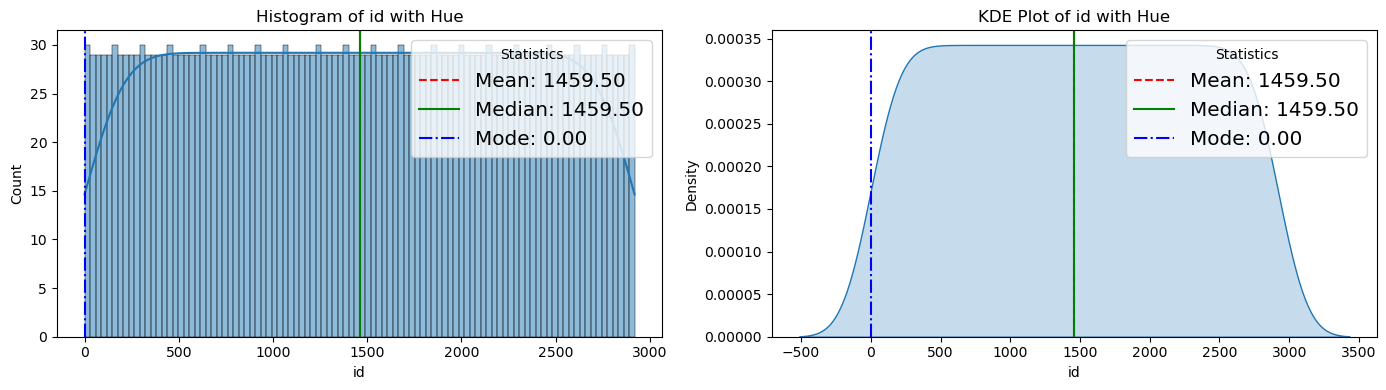

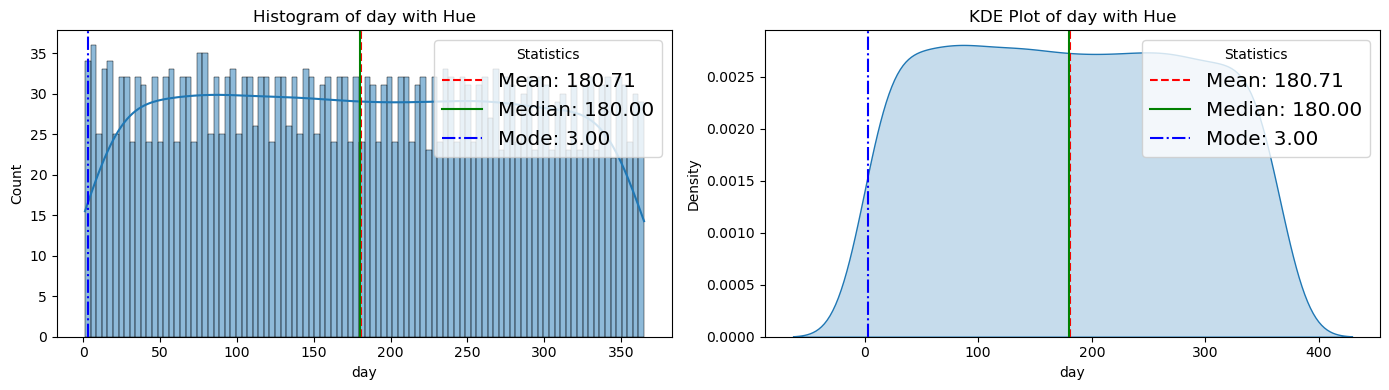

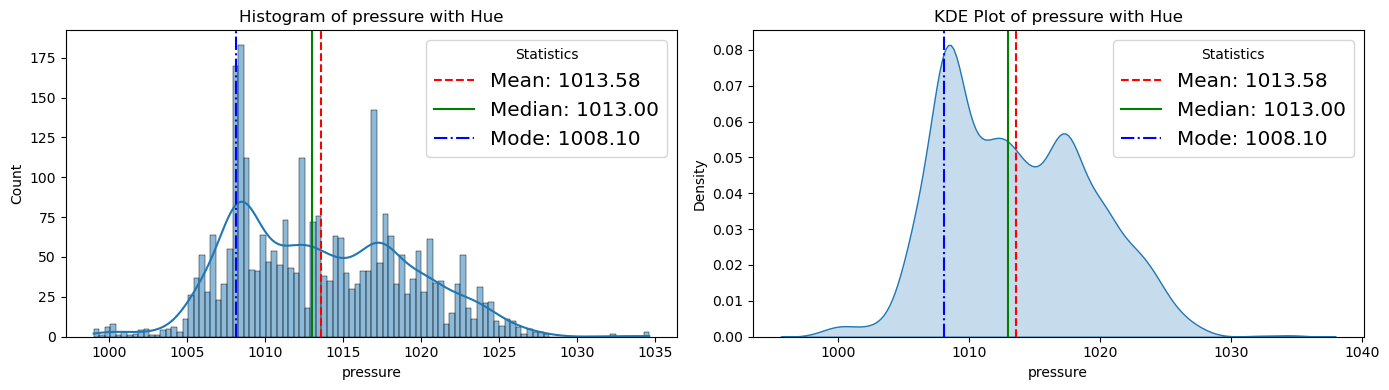

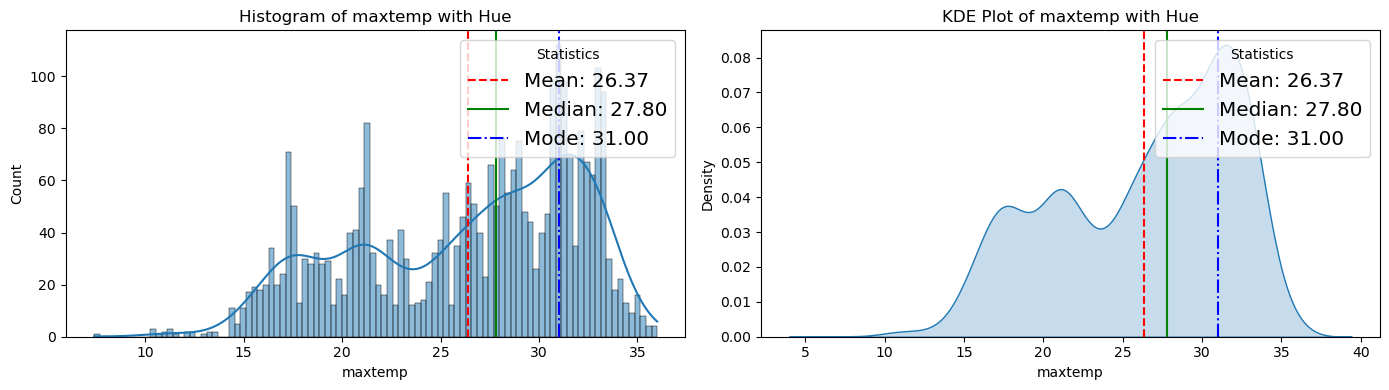

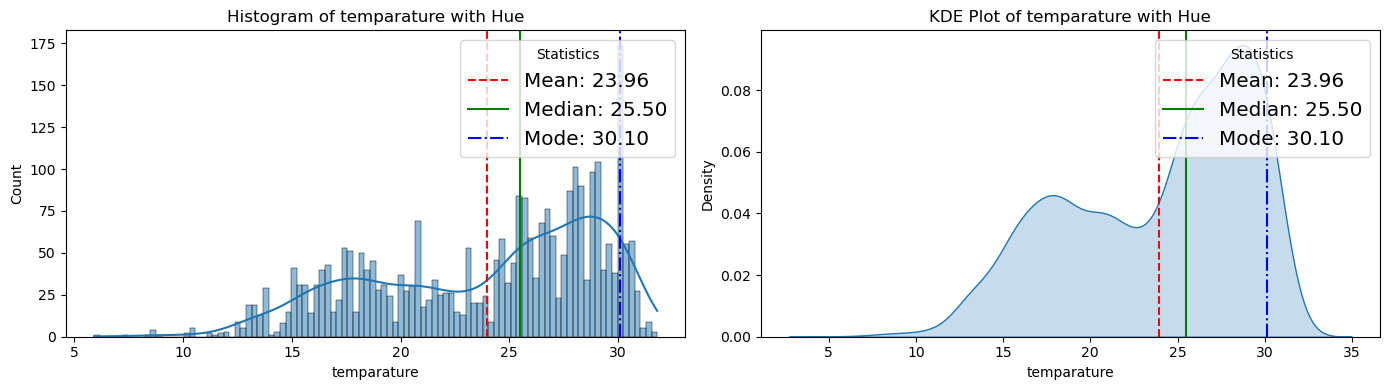

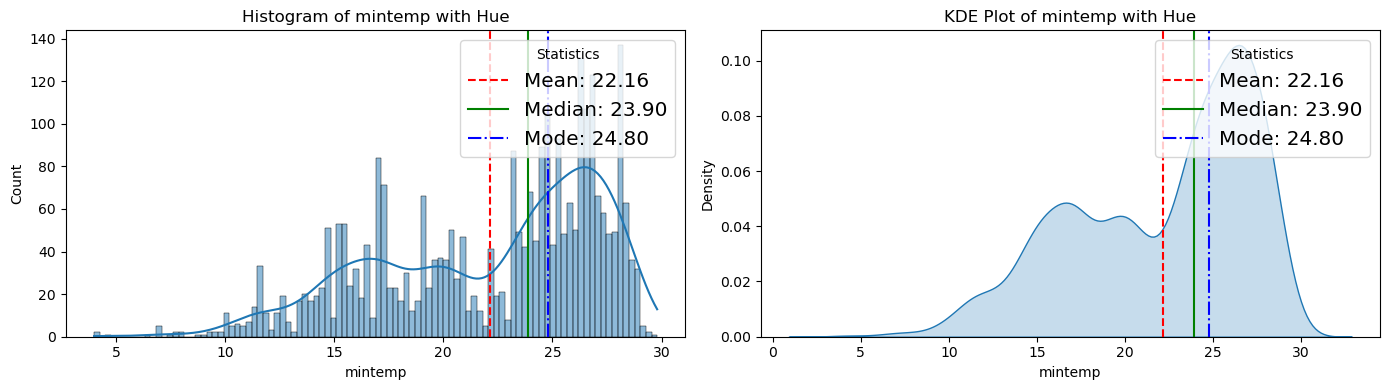

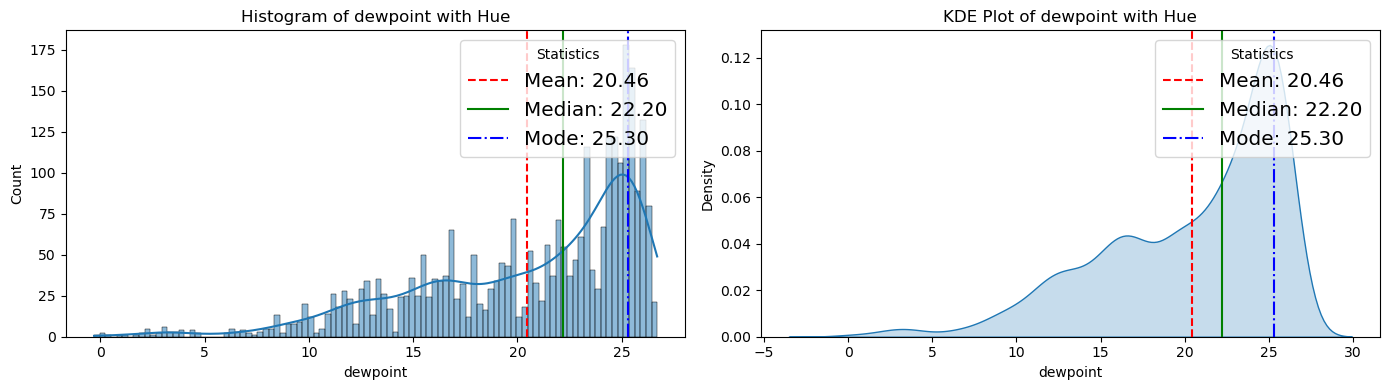

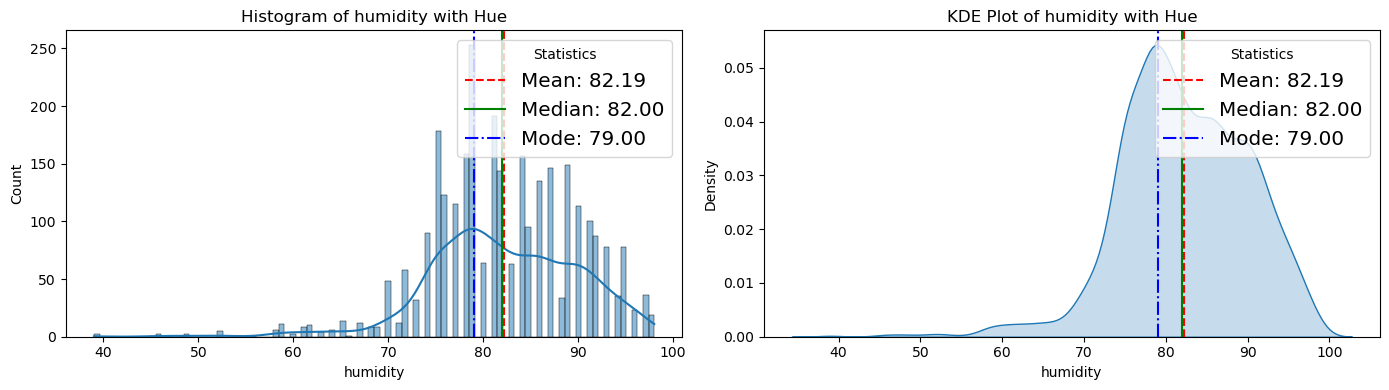

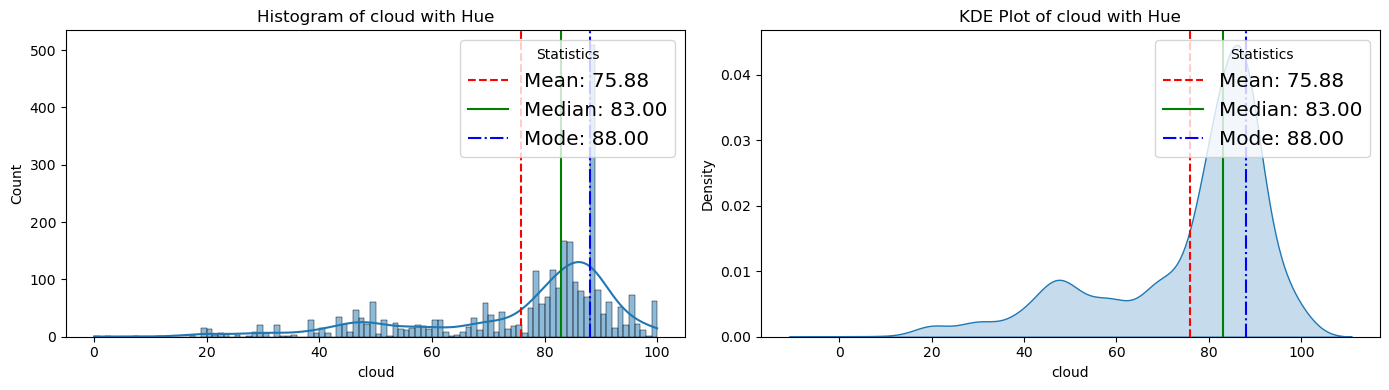

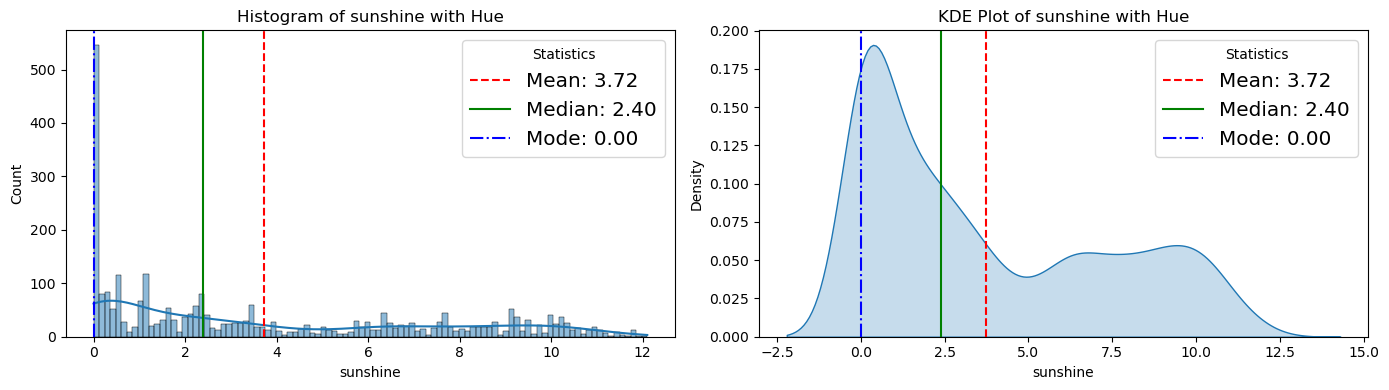

ValueError: cannot reindex on an axis with duplicate labels

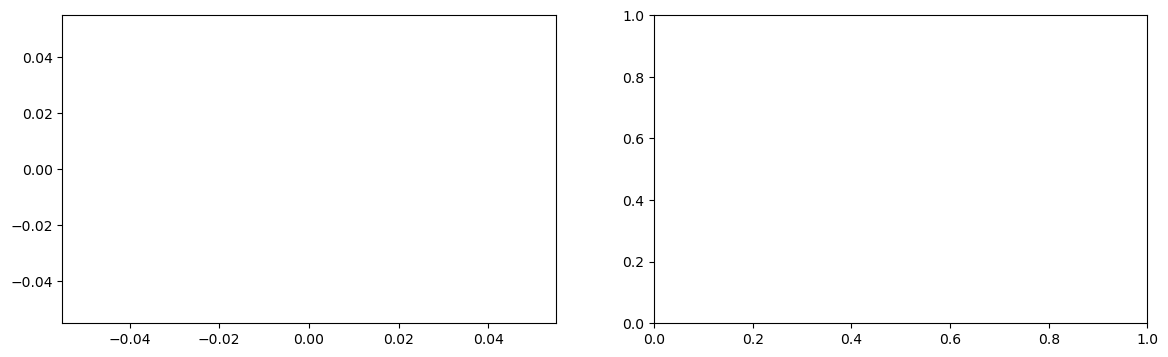

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# @title continuous feature distributions with mean, median, and mode
def target3_plot(column, train):
    import warnings
    warnings.filterwarnings("ignore")

    hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

    # Calculate mean, median, and mode
    mean_value = train[column].mean()
    median_value = train[column].median()
    mode_value = train[column].mode()[0]  # mode() returns a Series, we select the first mode

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

    # Plot histogram with hue
    sns.histplot(data=train, x=column, hue_order=hue_columns, bins=100, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column} with Hue')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')

    # Add lines for mean, median, and mode on the histogram
    axes[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
    axes[0].legend(title='Statistics', loc='upper right', fontsize="x-large")

    # Plot KDE plot with hue
    sns.kdeplot(data=train, x=column, shade=True, hue_order=hue_columns, ax=axes[1])
    axes[1].set_title(f'KDE Plot of {column} with Hue')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')

    # Add lines for mean, median, and mode on the KDE
    axes[1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[1].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    axes[1].axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')
    axes[1].legend(title='Statistics', loc='upper right', fontsize="x-large")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage:
for i in test.columns:
    if i != "error":
        target3_plot(i, combined)


In [ ]:
# a = []

# for j in train.columns:
#     for i in train.columns:
#             if (i, j) not in a and (j, i) not in a and i!=j:
#                 a.append((i, j))
#                 plt.figure(figsize=(20, 5))
#                 sns.scatterplot(data=train, x=j, y=i, hue='error', s=8)
#                 plt.show()

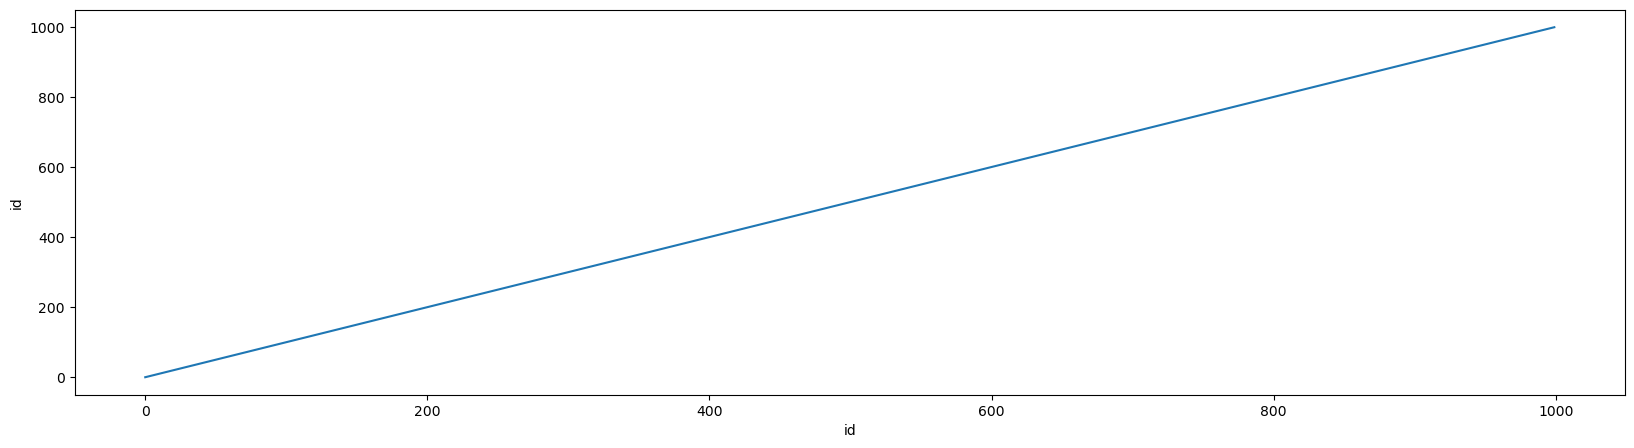

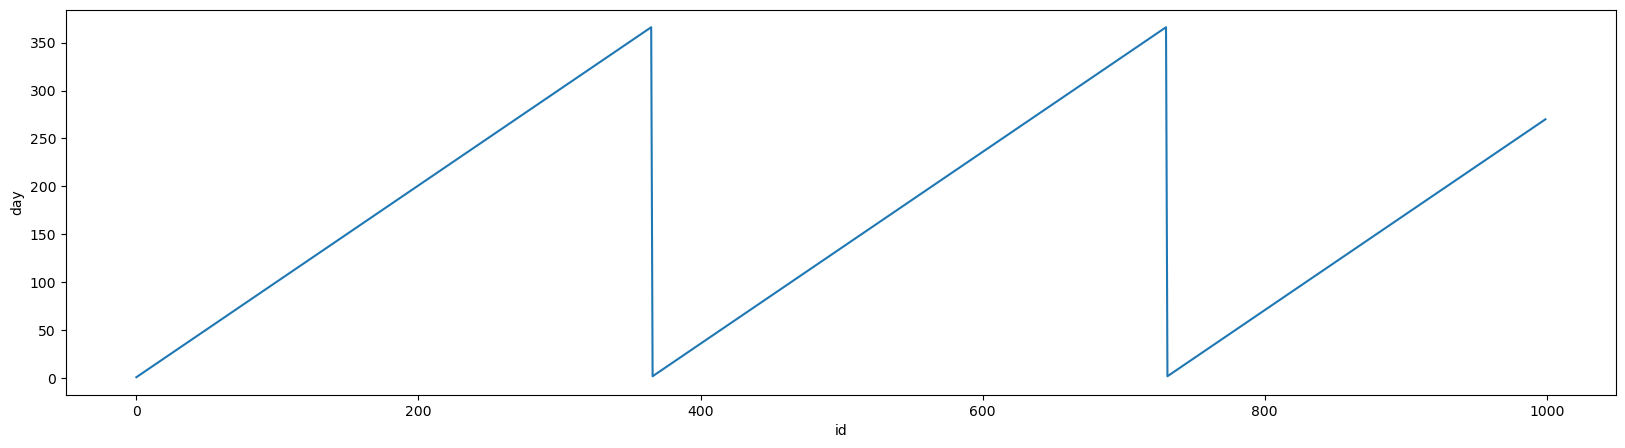

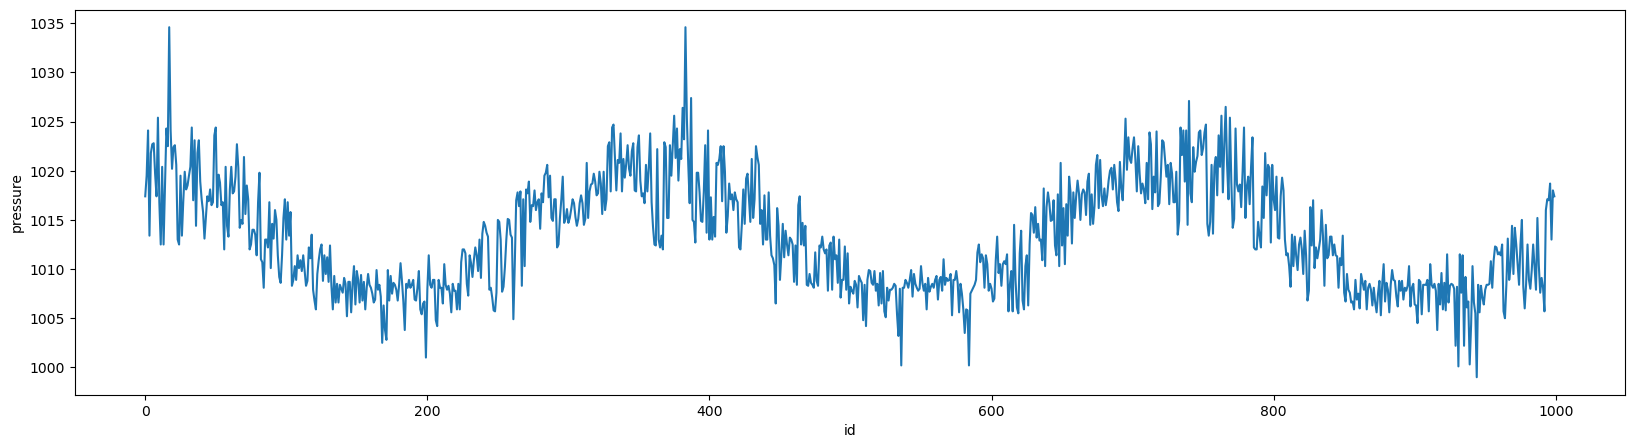

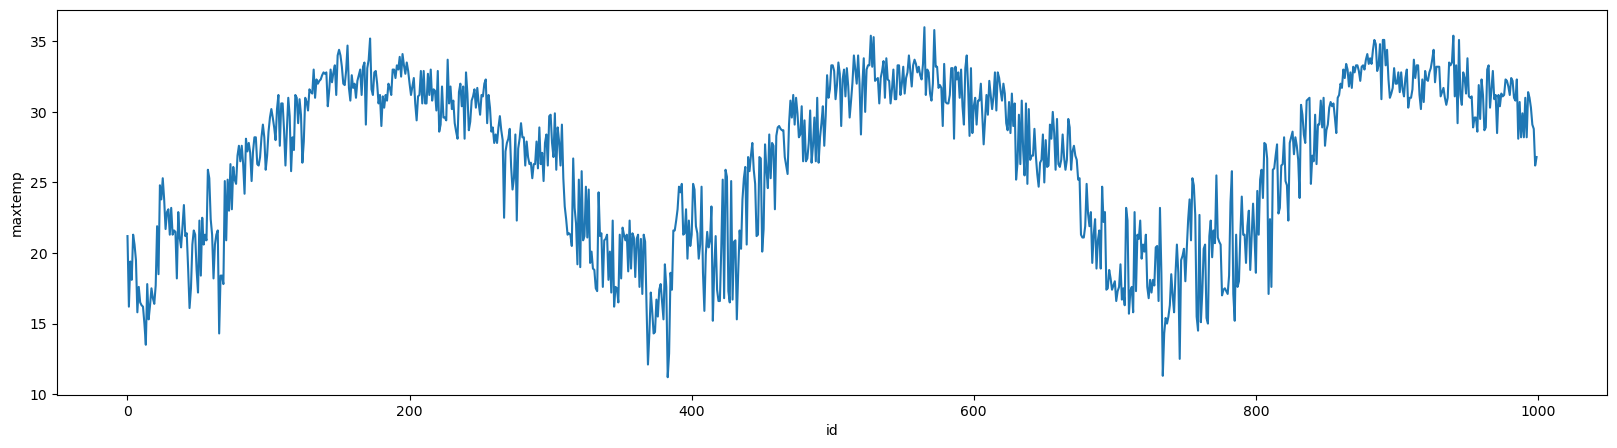

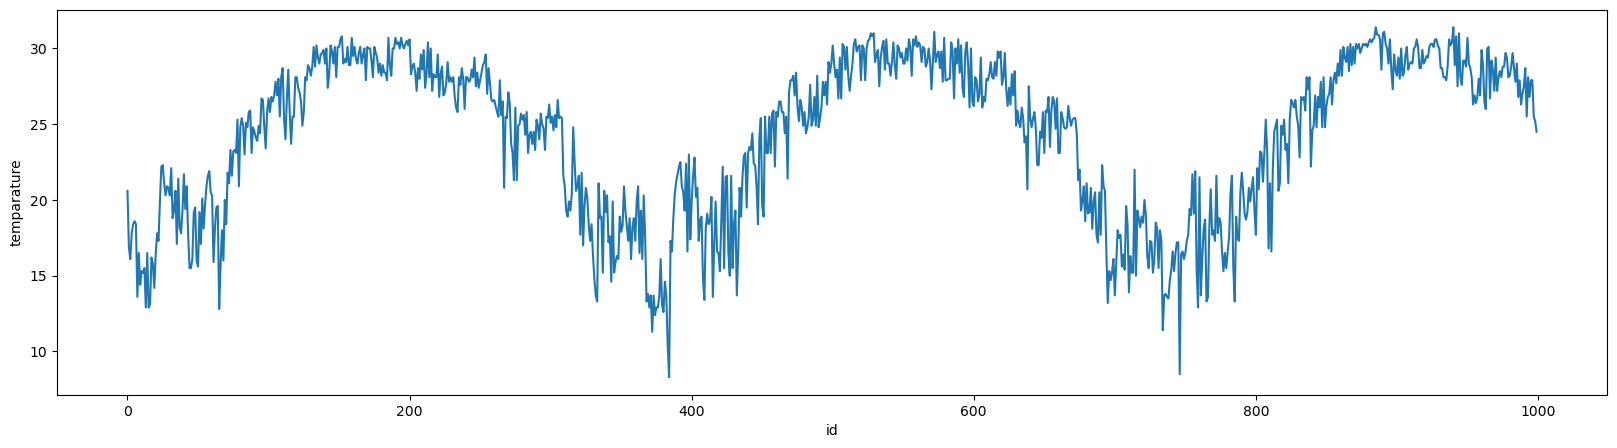

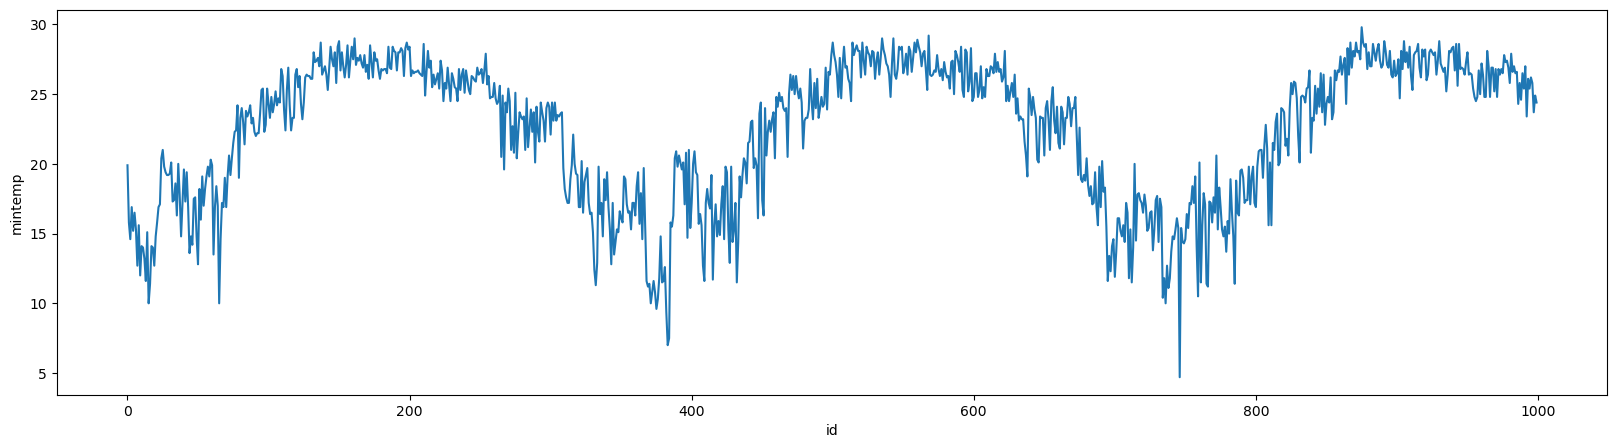

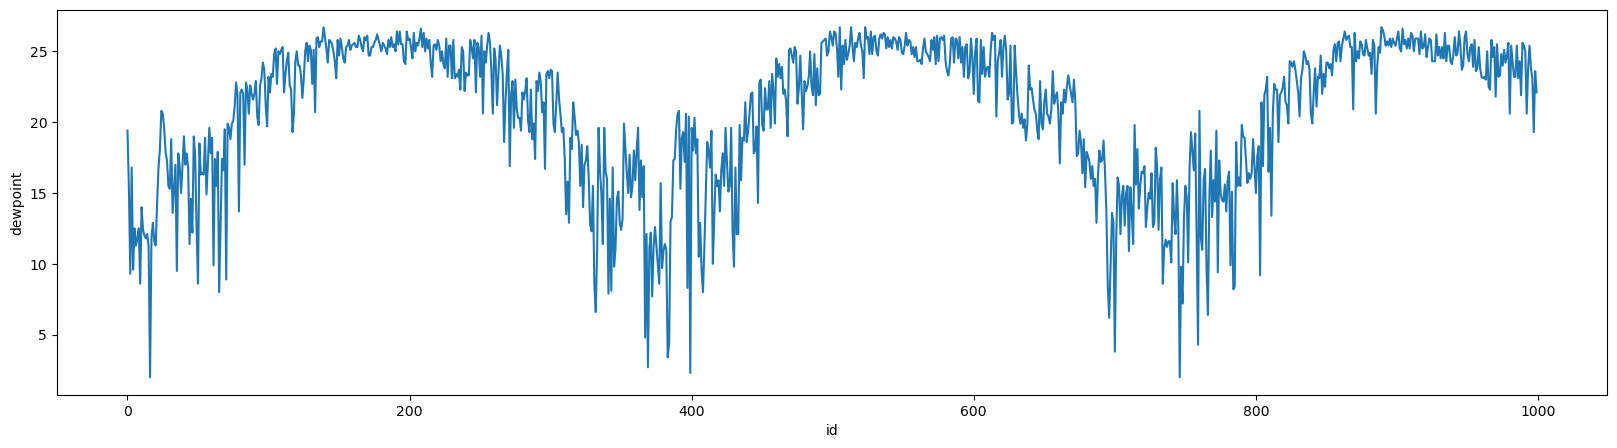

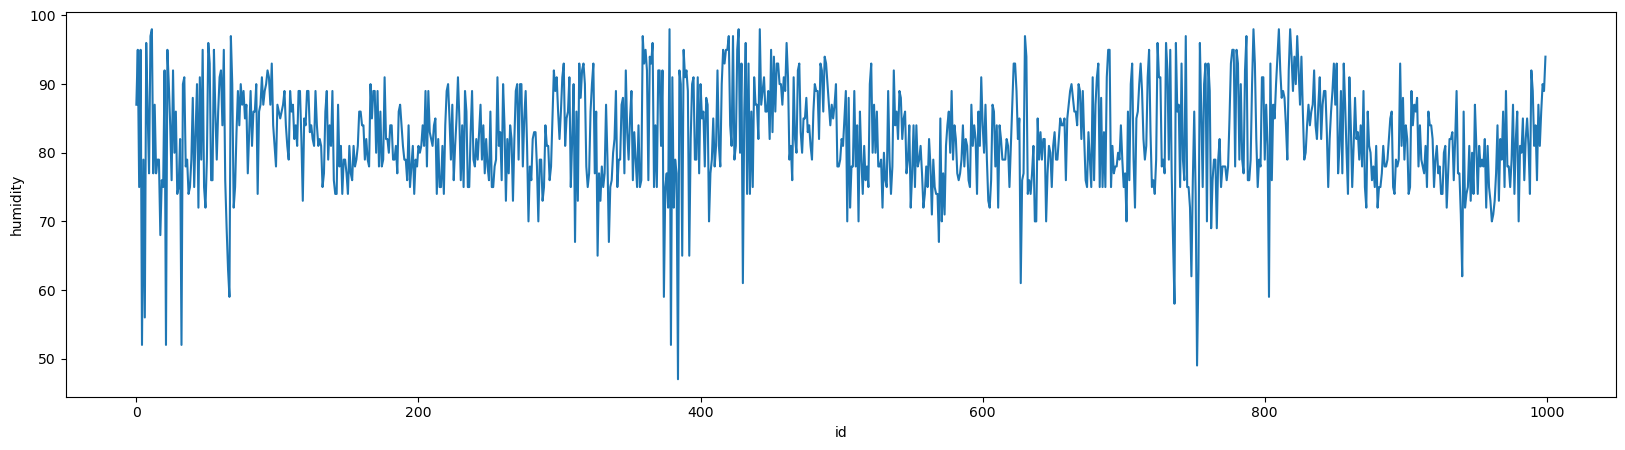

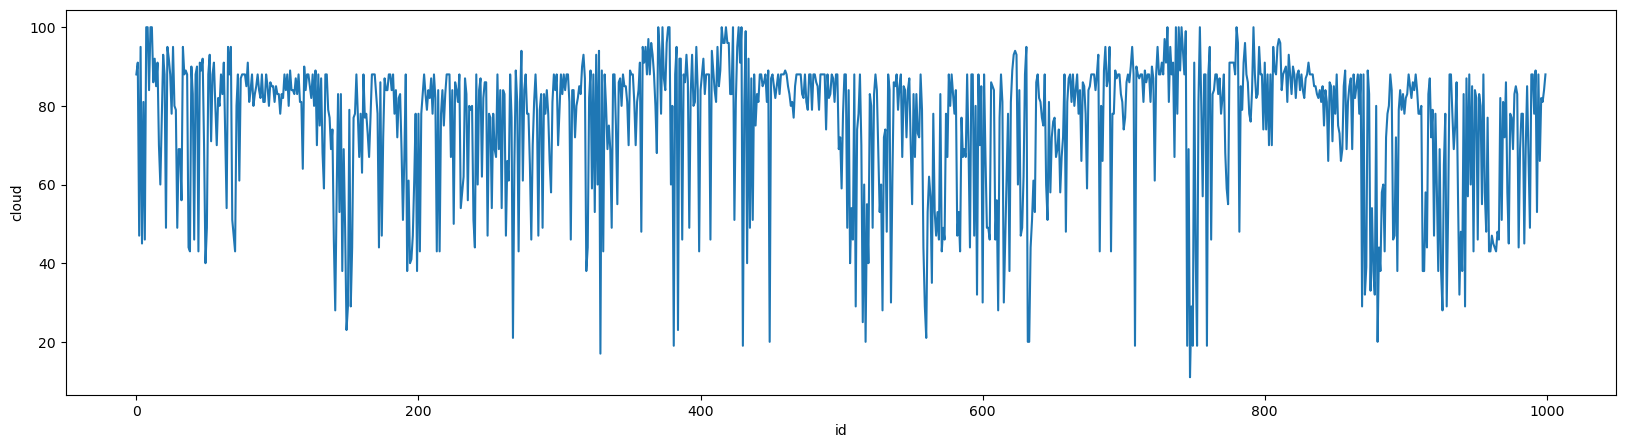

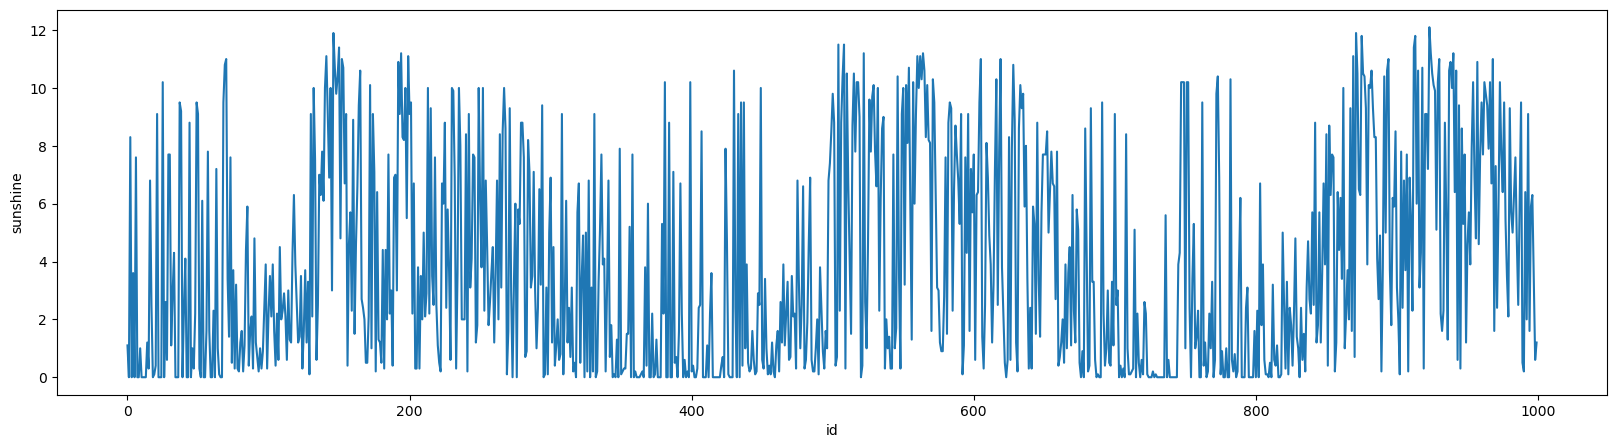

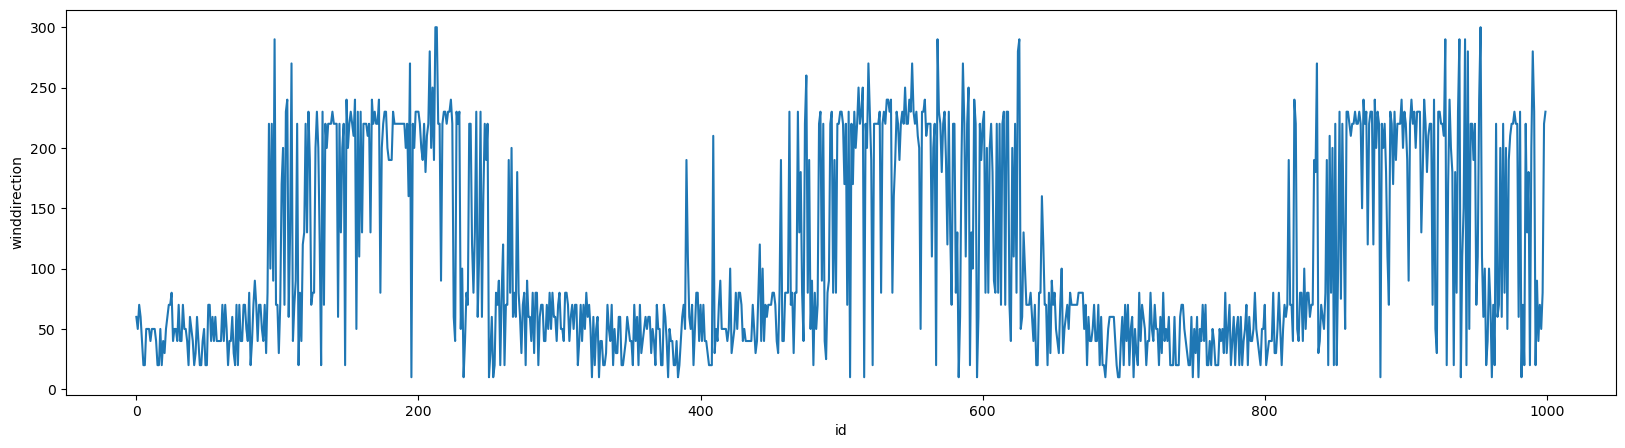

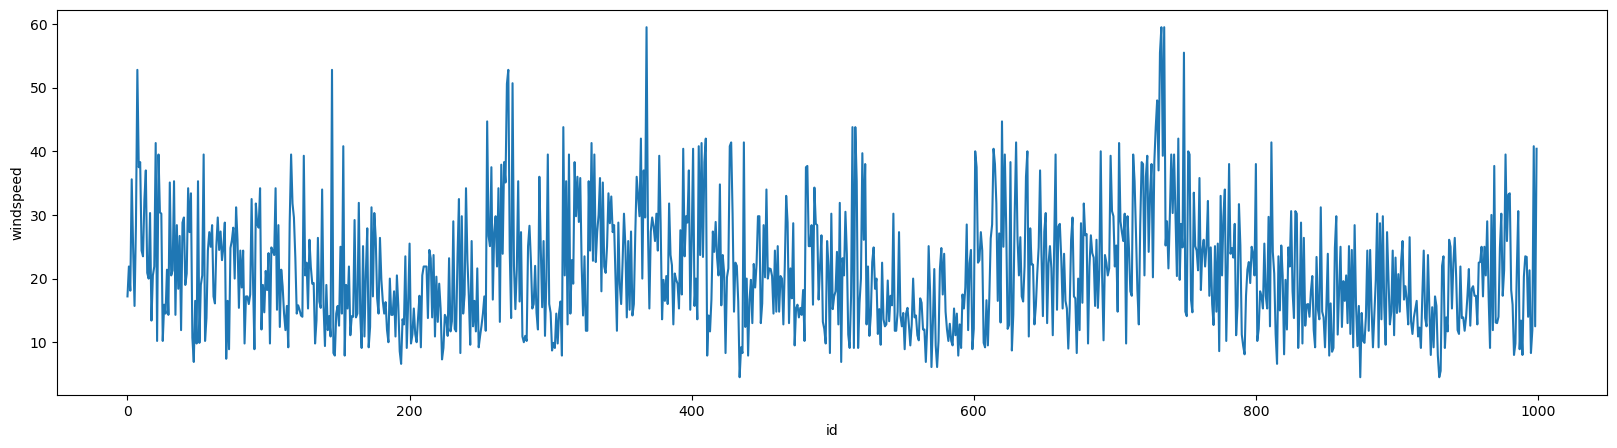

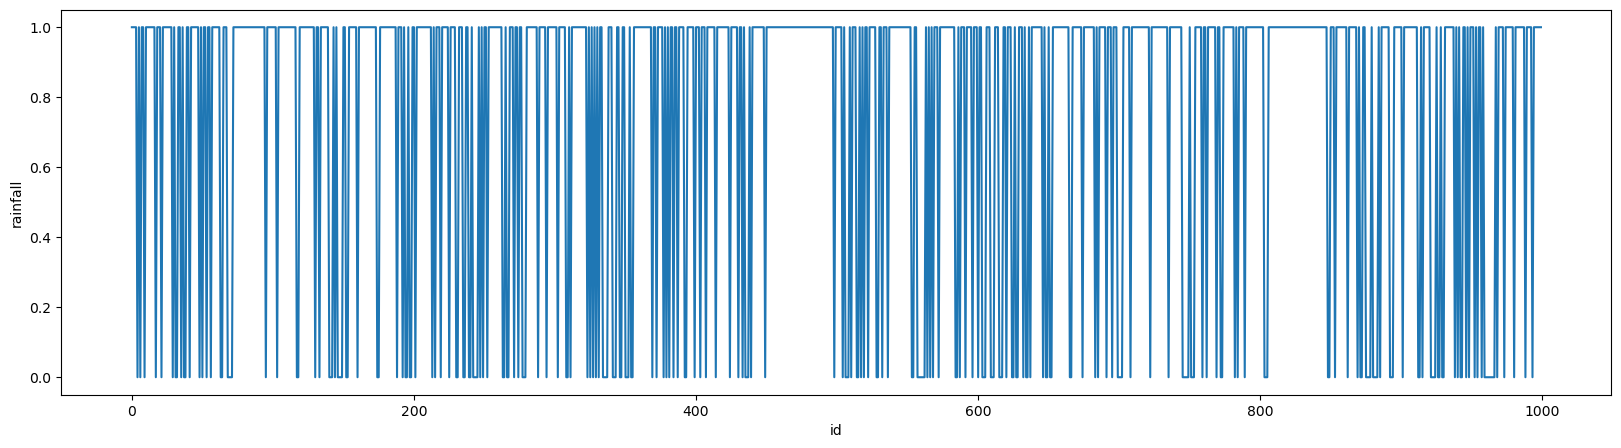

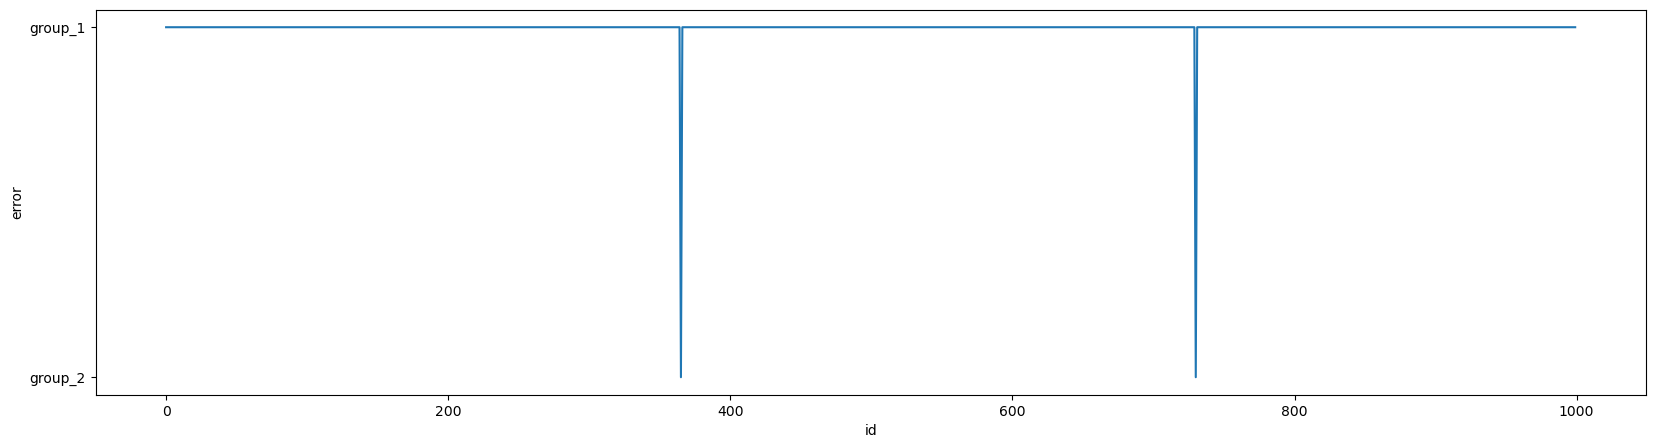

In [ ]:
for i in train.columns:
    plt.figure(figsize=(20, 5))
    sns.lineplot(data=train[0:1000], x='id', y= i)
    plt.show()


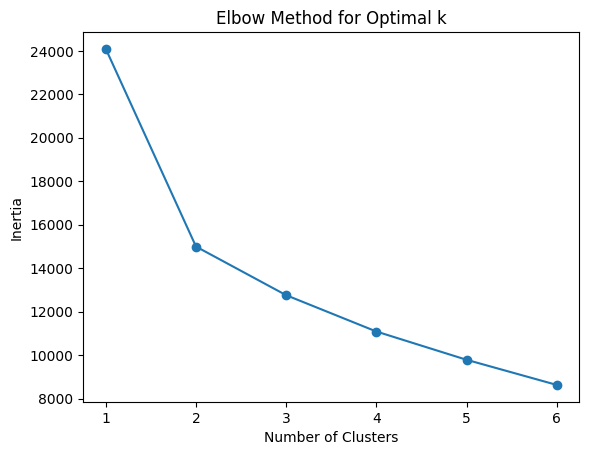

In [ ]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# labels = kmeans.labels_
range_k=range(1,7)
inertia=[]

for k in range_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.000 --> 0.000 --> 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.0s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s


Resumed because of empty cluster


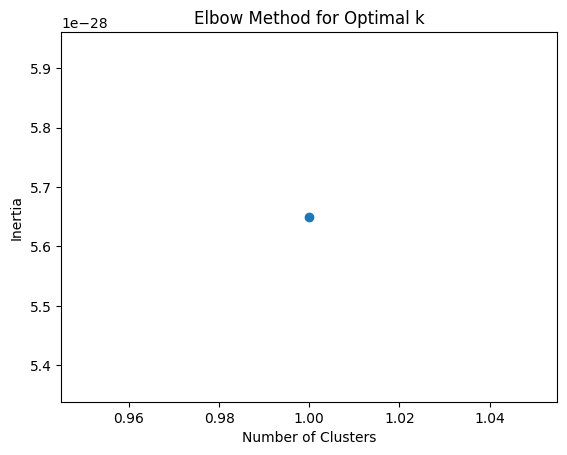

In [ ]:

from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for i in x])

# Convert the scaled data into the format required by tslearn
X_ts = to_time_series_dataset(X_scaled)

# labels = kmeans.labels_
range_k=range(1,7)
inertia=[]

for k in range_k:
    kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw", verbose=True, random_state=0)

    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


343.900 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


219.820 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


219.592 --> 219.592 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


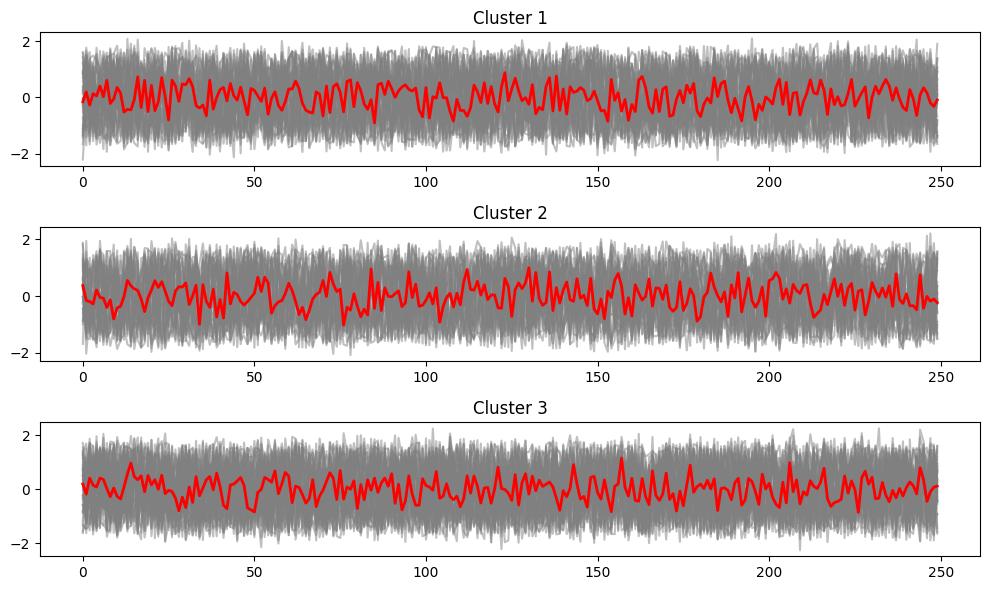

Cluster assignments: [0 1 1 2 1 0 2 0 1 2 1 2 2 2 2 2 1 2 0 1 2 0 0 2 0 1 0 0 2 1 0 2 1 0 2 2 0
 2 1 2 1 0 1 2 0 2 0 1 2 2 0 2 0 1 0 1 2 2 2 1 2 0 2 2 1 1 1 1 0 2 0 0 1 1
 2 2 0 1 2 0 0 0 2 0 2 0 0 0 1 1 1 0 1 2 2 0 2 0 1 1]


In [ ]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulated time series data: (n_samples, n_timestamps, n_features)
# You can replace this with your actual time series dataset
# Let's assume 100 time series, each with 50 timestamps and 5 features
n_samples = 100
n_timestamps = 50
n_features = 5

# Create synthetic time series data (replace with your actual dataset)
np.random.seed(0)
X = np.random.rand(n_samples, n_timestamps, n_features)

# Standardize the features
scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])

# Convert the scaled data into the format required by tslearn
X_ts = to_time_series_dataset(X_scaled)

# Determine the number of clusters
# You can use methods like the elbow method or silhouette score to find the optimal k
# Here, we'll assume a k=3 for simplicity, but you can fine-tune it
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=True, random_state=0)

# Fit the model
y_pred = kmeans.fit_predict(X_ts)

# Visualize the results
plt.figure(figsize=(10, 6))

for cluster_idx in range(3):
    plt.subplot(3, 1, cluster_idx + 1)
    for series in X_ts[y_pred == cluster_idx]:
        plt.plot(series.ravel(), color='gray', alpha=0.5)
    plt.plot(kmeans.cluster_centers_[cluster_idx].ravel(), color='red', linewidth=2)
    plt.title(f"Cluster {cluster_idx + 1}")

plt.tight_layout()
plt.show()

# Optionally, you can print the cluster assignments for each sample
print("Cluster assignments:", y_pred)
